In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/2021socio_economic_indonesia.csv')

# Display the first few rows of the dataframe
print(df.head())


  province     cities_reg  poorpeople_percentage  reg_gdp  life_exp  \
0     Aceh       Simeulue                  18.98    2.275    65.240   
1     Aceh   Aceh Singkil                  20.36    2.425    67.355   
2     Aceh   Aceh Selatan                  13.18    5.531    64.360   
3     Aceh  Aceh Tenggara                  13.41    5.063    68.155   
4     Aceh     Aceh Timur                  14.45   10.616    68.705   

   avg_schooltime  exp_percap  
0            9.48        7148  
1            8.68        8776  
2            8.88        8180  
3            9.67        8030  
4            8.21        8577  


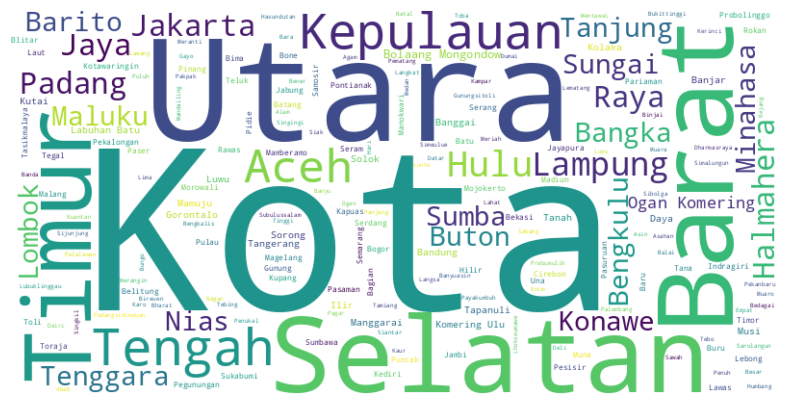

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['cities_reg'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**Observation of word chart:**
The word cloud shows that "Kota," "Utara," "Selatan," and "Barat" are the most frequent terms, indicating a focus on city names and directional regions (North, South, West) in Indonesia. The variety of names like "Jakarta," "Aceh," and "Lampung" suggests a broad geographical spread.

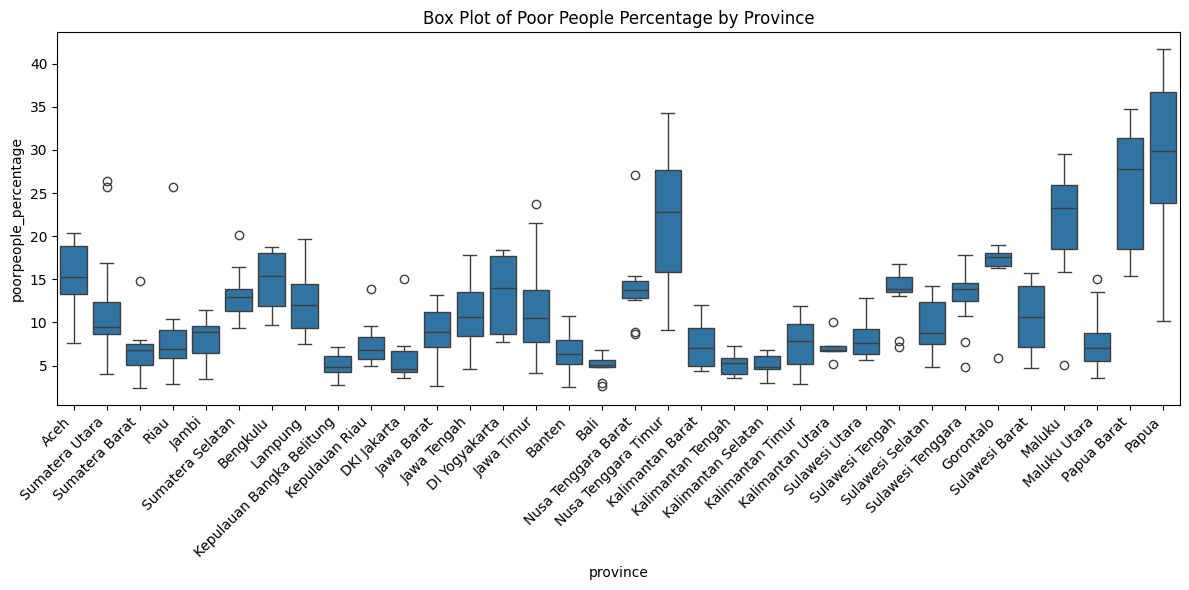

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# sns.boxplot(x='province', y='poorpeople_percentage', data=df)
# plt.title('Box Plot of Poor People Percentage by Province')
# plt.show()


import matplotlib.ticker as ticker

plt.figure(figsize=(12, 6))
sns.boxplot(x='province', y='poorpeople_percentage', data=df)
plt.title('Box Plot of Poor People Percentage by Province')

# Wrap long x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right
plt.tight_layout()  # Adjust layout to fit labels
plt.show()



**Observation for box-whisker plot:** The box plot reveals significant insights into the distribution of poverty across various provinces. The chart shows considerable variation in poverty levels, with some provinces exhibiting higher median percentages of poor people.

<ipython-input-26-3c8f123f7a00>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-26-3c8f123f7a00>:9: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.



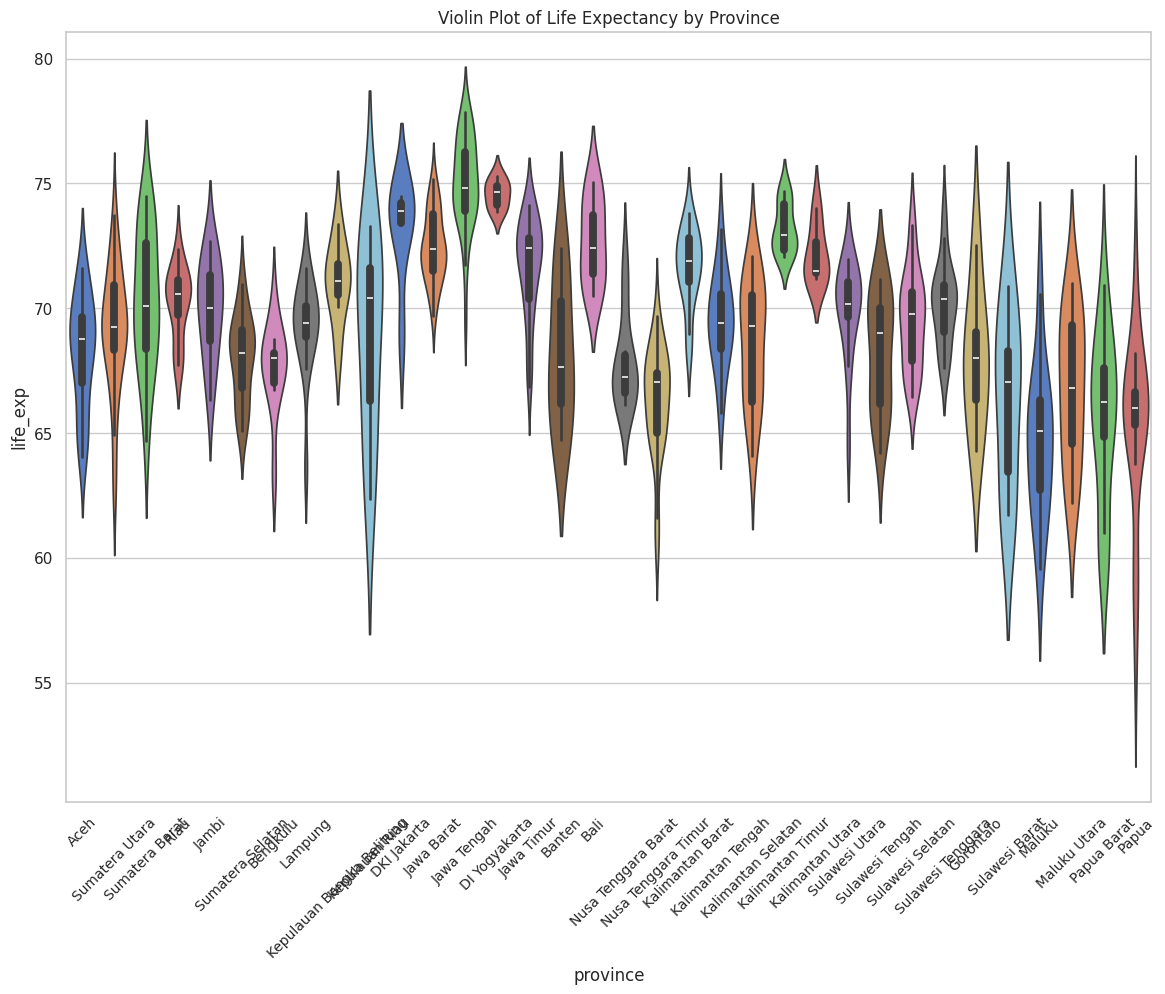

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size and style for better visualization
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")  # Use a style that improves presentation

# Create the violin plot with horizontal orientation for better visibility
sns.violinplot(x='province', y='life_exp', data=df, scale='width', palette="muted")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Add title
plt.title('Violin Plot of Life Expectancy by Province')

# Show the plot
plt.show()



**Observation of violin plot:** The violin plot shows the distribution of life expectancy across various provinces. Each violin's width indicates the frequency of life expectancy values, with wider sections representing more common values. The plot highlights significant variations in life expectancy between provinces, with some distributions being symmetrical and others skewed, indicating differences in how life expectancy is spread within those populations.

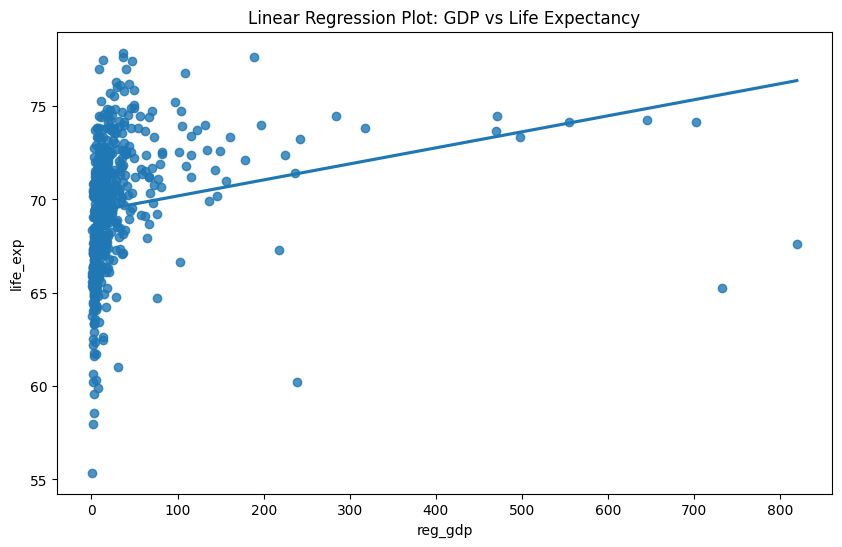

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='reg_gdp', y='life_exp', data=df, ci=None)
plt.title('Linear Regression Plot: GDP vs Life Expectancy')
plt.show()


**Observation of Linear Reg:**The scatter plot above shows a positive correlation between GDP and life expectancy. As GDP increases, life expectancy tends to rise as well. The trend line slopes upwards, indicating this relationship. Data points are denser at lower GDP levels and spread out as GDP increases, suggesting that higher GDP is associated with longer life expectancy.

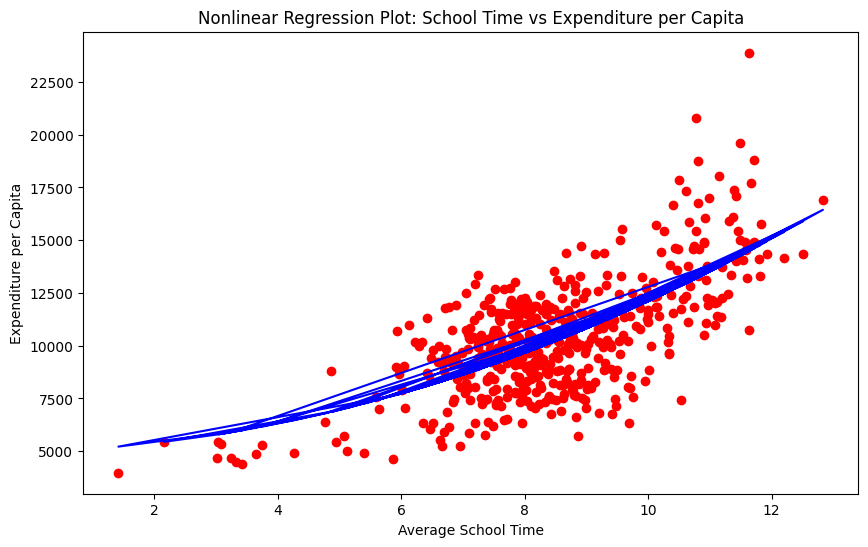

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Polynomial regression (quadratic)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['avg_schooltime']])
poly_reg = LinearRegression()
poly_reg.fit(X_poly, df['exp_percap'])

plt.figure(figsize=(10, 6))
plt.scatter(df['avg_schooltime'], df['exp_percap'], color='red')
plt.plot(df['avg_schooltime'], poly_reg.predict(X_poly), color='blue')
plt.title('Nonlinear Regression Plot: School Time vs Expenditure per Capita')
plt.xlabel('Average School Time')
plt.ylabel('Expenditure per Capita')
plt.show()


**Observation of Non-Linear Reg:** The scatter plot above School Time vs Expenditure per Capita” shows a relationship between average school time and expenditure per capita. The blue curved line indicates a nonlinear regression model fitting the data points. As average school time increases, expenditure per capita also tends to rise, suggesting a positive correlation. The data points are scattered, with higher concentrations at certain school time intervals, indicating varying levels of expenditure per capita associated with different average school times.

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='reg_gdp', y='life_exp', z='exp_percap',
                    color='province', title='3D Scatter Plot')
fig.show()


**Observation of 3D plot:** The 3D scatter plot visualizes the relationship between regional GDP (reg_gdp), life expectancy (life_exp), and expenditure per capita (exp_percap) across various Indonesian provinces. Each province is represented by a different color, allowing for easy identification of patterns and clusters. This visualization helps in understanding how economic factors (GDP) and social factors (life expectancy and expenditure) vary among the provinces, highlighting potential areas of disparity or correlation.

<ipython-input-17-f06ceaa50508>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




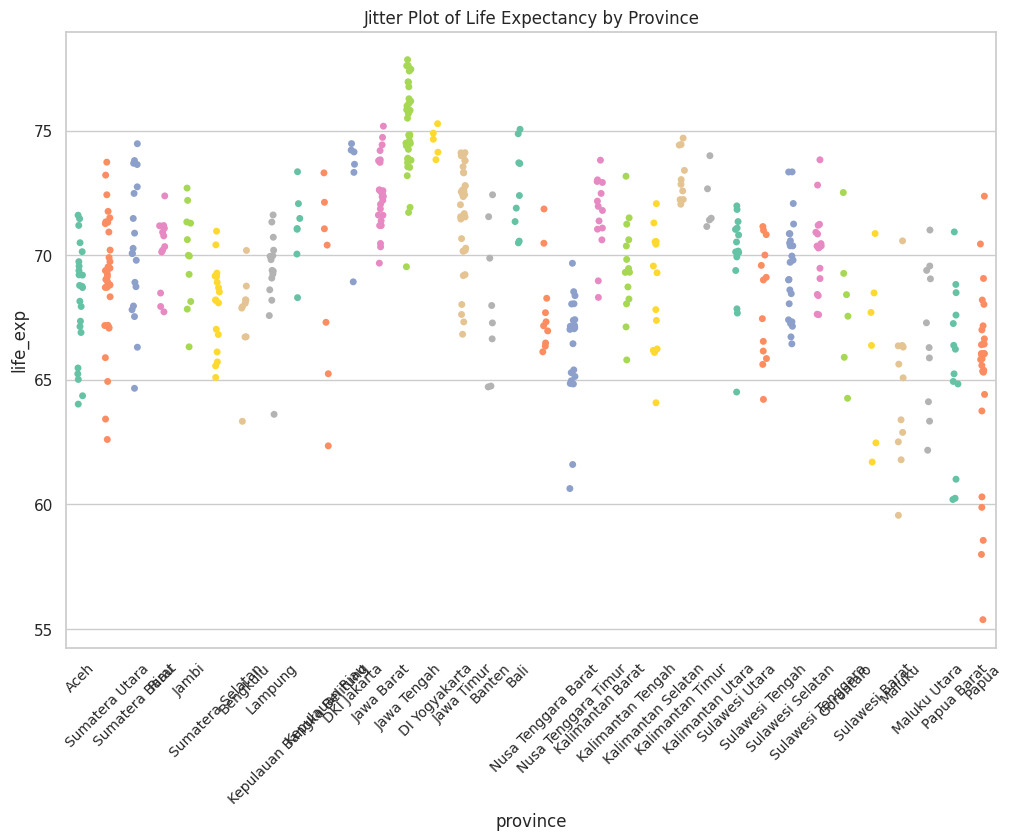

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size for better spacing
plt.figure(figsize=(12, 8))

# Create the jitter plot
sns.stripplot(x='province', y='life_exp', data=df, jitter=True, palette="Set2")

# Rotate x-axis labels and reduce font size for better readability
plt.xticks(rotation=45, fontsize=10)  # Rotate and adjust font size

# Add title
plt.title('Jitter Plot of Life Expectancy by Province')

# Show the plot
plt.show()


**Observation of Jitter plot:** The plot shows the distribution of life expectancy across various provinces. Each dot represents a data point for life expectancy, with provinces labeled along the horizontal axis. The vertical axis ranges from 60 to 75 years. The plot reveals variations in life expectancy within and between provinces, with some provinces showing a wider spread of data points. Horizontal lines indicate the mean or median life expectancies, providing a reference for comparison. This visualization highlights disparities and patterns in life expectancy across different regions.

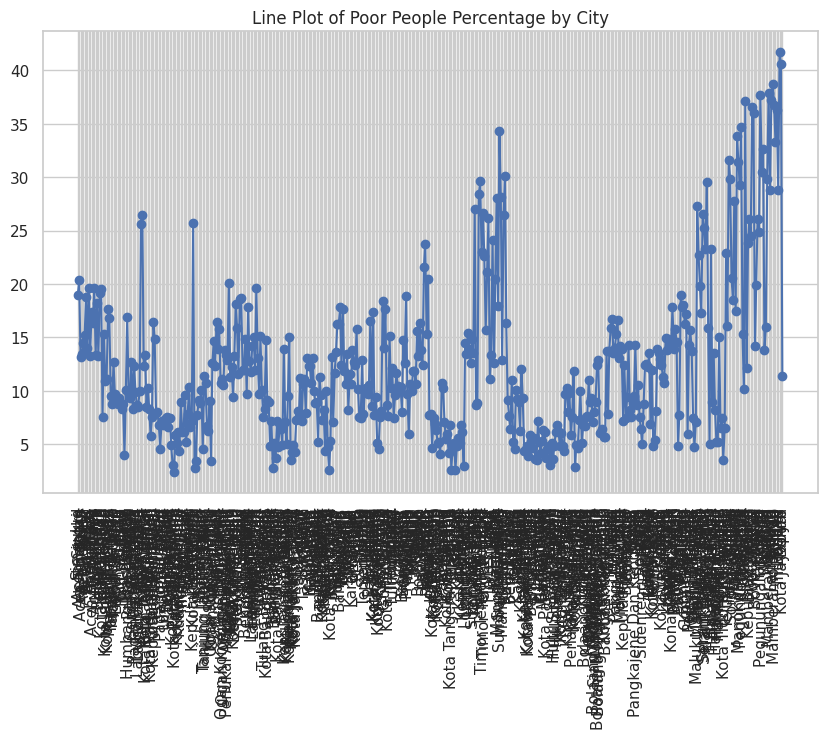

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['cities_reg'], df['poorpeople_percentage'], marker='o')
plt.title('Line Plot of Poor People Percentage by City')
plt.xticks(rotation=90)
plt.show()


**Observation of Line plot:** The plot shows the percentage of poor people across various cities. The vertical axis ranges from 0 to 40 percent, while the horizontal axis lists the cities. The plot reveals significant fluctuations in poverty levels, with numerous peaks and valleys indicating varying percentages of poor people among the cities. This visualization highlights the disparities in poverty distribution, providing a comparative view of socio-economic conditions across different urban areas.

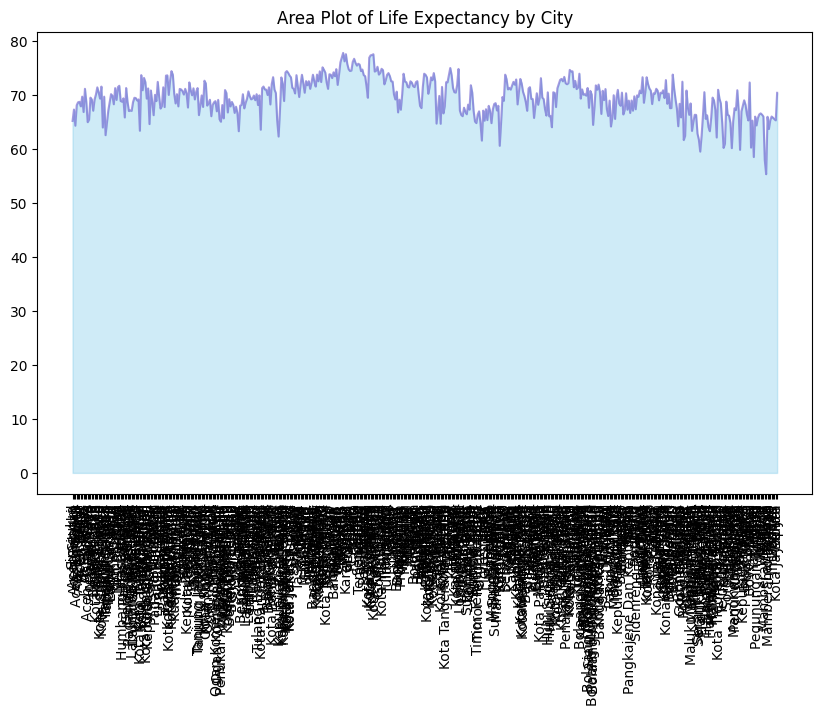

In [ ]:
plt.figure(figsize=(10, 6))
plt.fill_between(df['cities_reg'], df['life_exp'], color="skyblue", alpha=0.4)
plt.plot(df['cities_reg'], df['life_exp'], color="Slateblue", alpha=0.6)
plt.title('Area Plot of Life Expectancy by City')
plt.xticks(rotation=90)
plt.show()


**Observation of Area plot:** the plot shows the average life expectancy across various cities. The vertical axis ranges from 0 to 80 years, with the area under the line filled in light blue. The plot indicates a relatively stable life expectancy, mostly between 70 and 80 years, across different cities. This suggests minimal variation in life expectancy among the cities, highlighting a generally high and consistent level of public health and living conditions.

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name="Waterfall",
    orientation="v",
    measure=["relative"] * len(df),
    x=df['cities_reg'],
    y=df['poorpeople_percentage'],
    text=df['poorpeople_percentage'],
    connector={"line": {"color": "rgb(63, 63, 63)", "width": 2}},
))
fig.update_layout(title="Waterfall Chart of Poor People Percentage by City")
fig.show()


**Observation of waterfall chart:** The plot shows an increasing trend in the percentage of poor people across various cities. The y-axis ranges from 0 to 6000, indicating the number of poor people. The chart highlights significant disparities in poverty levels among the cities, with some cities experiencing higher percentages of poor people.

In [ ]:
import plotly.express as px

# Create the donut chart with adjusted settings for better visibility
fig = px.pie(df,
             names='cities_reg',
             values='poorpeople_percentage',
             hole=0.5,  # Increase the hole size for a bigger donut
             title='Donut Chart of Poor People Percentage by City')

# Update layout to make the donut bigger and remove unnecessary elements
fig.update_layout(
    width=800,  # Increase the figure width
    height=800,  # Increase the figure height
    plot_bgcolor='white',  # Set the plot background color to white
    paper_bgcolor='white',  # Set the paper (background outside plot) color to white
    showlegend=True,  # Show legend
    margin=dict(t=50, b=50, l=50, r=50)  # Adjust margins to reduce empty space
)

# Update traces to enhance visibility
fig.update_traces(
    textinfo='percent+label',  # Show both percentage and label in the donut
    textposition='inside',  # Place the text inside the slices
    marker=dict(line=dict(color='white', width=2))  # Define slice borders for clarity
)

# Display the chart
fig.show()


**Observation of Donut Chart:** Plot shows the percentage of poor people across various cities. Each segment of the donut chart is color-coded to correspond to different cities, such as Intan Jaya, Jayapura, and Merauke. The varying thickness of the segments indicates the different percentages of poor people in each city. This chart provides a clear and comparative view of poverty levels, highlighting which cities have higher or lower percentages of poor people.

In [ ]:
import plotly.express as px

fig = px.treemap(df, path=['province', 'cities_reg'], values='poorpeople_percentage', title='Treemap of Poor People Percentage')
fig.show()


**Observation of TreeMap chart:** Plot represents the proportion of poor people across different regions using rectangles. Each rectangle’s size indicates the percentage of poverty in that region, with various colors representing different regions. The chart highlights areas with higher and lower percentages of poor people, providing a quick visual comparison between regions. This visualization is useful for identifying regions with significant poverty levels and can inform socio-economic policies and interventions.

In [ ]:
import plotly.graph_objects as go

# Funnel Chart for Expenditure per Capita
fig4 = go.Figure(go.Funnel(
    y=df['cities_reg'],
    x=df['exp_percap'],
    textinfo="value+percent initial"
))
fig4.update_layout(title="Funnel Chart of Expenditure per Capita by City")
fig4.show()

**Observation of Funnel Chart:** The chart displays the distribution of expenditure per capita across various cities. Each city's data is represented as a horizontal bar, with the width corresponding to the expenditure per capita. The chart is symmetrical, indicating a balanced distribution between lower and higher expenditure values across these cities. However, there are variations in the spread of expenditure, as some cities show wider ranges (indicating more variability in spending) while others have narrower bands (suggesting more uniform expenditure patterns).